In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

data1 = pd.read_excel(r"C:\Users\49179\Desktop\Yara Data Assignment\Customer Churn.xlsx")


In [17]:
data1.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ... Tech Support  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...           No   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...           No   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...           No   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...          Yes   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...           No   

  Streaming TV Streaming Movies        Contract Paperless Billing  \
0           No               No  Month-to-month               Yes   
1           No               No  Month-to-month               Yes   
2          Yes              Yes  Month-to-month               Yes   
3          Yes              Yes  Month-to-month               Yes   
4          Yes              Yes  Month-to-month               Yes   

              Payment Method Monthly Charges Total Charges Churn Label  \
0               Mailed check           53.85        108.15         Yes   
1           Electronic check           70.70        151.65         Yes   
2           Electronic check           99.65         820.5         Yes   
3           Electronic check          104.80       3046.05         Yes   
4  Bank transfer (automatic)          103.70        5036.3         Yes   

                    Churn Reason  
0   Competitor made better offer  
1                          Moved  
2                          Moved  
3                          Moved  
4  Competitor had better devices  

[5 rows x 30 columns]

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [19]:
data1.shape

(7043, 30)

In [21]:
data1 = data1.rename(columns={'Churn Label': 'ChurnLabel','Zip Code': 'ZipCode','Lat Long': 'LatLong', 'Senior Citizen': 'SeniorCitizen','Tenure Months': 'TenureMonths','Phone Service': 'PhoneService','Multiple Lines': 'MultipleLines', 'Internet Service': 'InternetService', 'Online Security': 'OnlineSecurity', 'Online Backup': 'OnlineBackup', 'Device Protection': 'DeviceProtection', 'Tech Support': 'TechSupport', 'Streaming TV': 'StreamingTV','Streaming Movies': 'StreamingMovies','Paperless Billing': 'PaperlessBilling','Payment Method': 'PaymentMethod','Monthly Charges': 'MonthlyCharges','Total Charges': 'TotalCharges', 'Churn Reason': 'ChurnReason'})

In [30]:
l_type = ["Churned", "Not churned"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=l_type, values=data1['ChurnLabel'].value_counts(), name="Churn Label", pull = [0,0.25,0,0]))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.6, hoverinfo="label+percent", textfont_size=16)

fig.update_layout(
    title_text="Churn Distribution",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn rate', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()


In [27]:
#location with more churns
data2 = data1[data1.ChurnLabel == 'Yes']
fig = px.scatter_mapbox(data2, lat='Latitude', lon='Longitude', 
                        hover_data=["Country", "State", 'City'], 
                       zoom = 4,
                       mapbox_style = 'stamen-terrain')

fig.show()

In [29]:
fig = px.box(data1, x='ChurnLabel', y = 'City')

# Update yaxis properties
fig.update_yaxes(title_text='City', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn status', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>City vs Churn</b>',
)

fig.show()


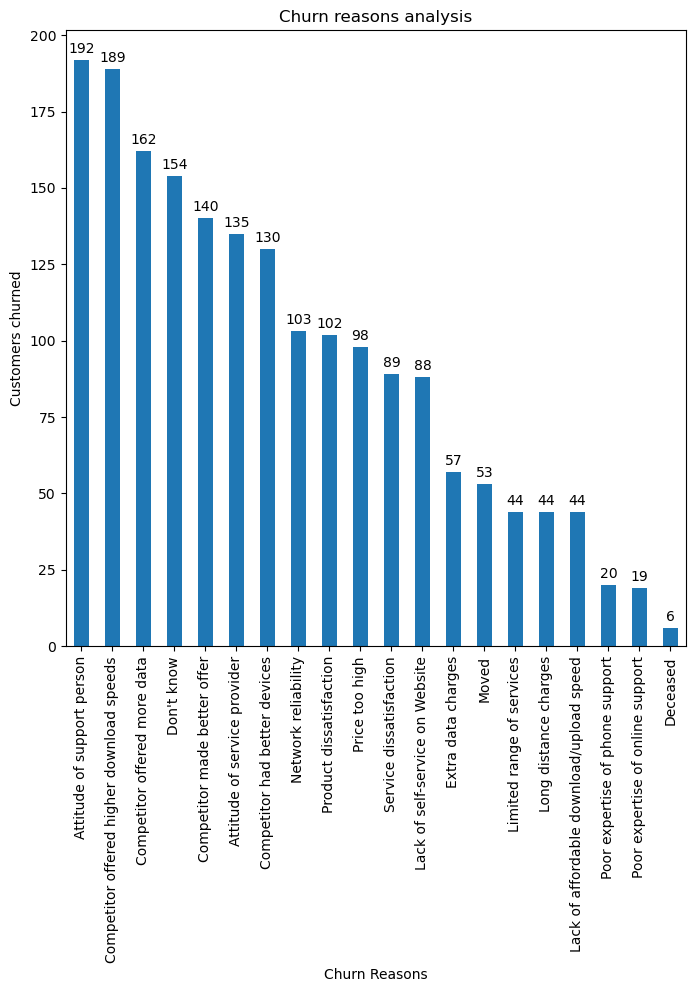

In [32]:
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = data1['ChurnReason'].value_counts().plot.bar()
 
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')    

# Setting the label for x-axis
plt.xlabel("Churn Reasons", size=10)
 
# Setting the label for y-axis
plt.ylabel("Customers churned", size=10)
 
# Setting the title for the graph
plt.title("Churn reasons analysis")
 
# Finally showing the plot
plt.show()


In [33]:
data1.ChurnLabel[data1.ChurnLabel == "Yes"].groupby(by = data1.Gender).count()

Gender
Female    939
Male      930
Name: ChurnLabel, dtype: int64

In [34]:
data1.ChurnLabel[data1.ChurnLabel == "No"].groupby(by = data1.Gender).count()

Gender
Female    2549
Male      2625
Name: ChurnLabel, dtype: int64

In [35]:
data2.ChurnLabel[data2.Gender == "Female"].groupby(by = data2.SeniorCitizen).count()

SeniorCitizen
No     699
Yes    240
Name: ChurnLabel, dtype: int64

In [36]:
data2.ChurnLabel[data2.Gender == "Male"].groupby(by = data2.SeniorCitizen).count()

SeniorCitizen
No     694
Yes    236
Name: ChurnLabel, dtype: int64

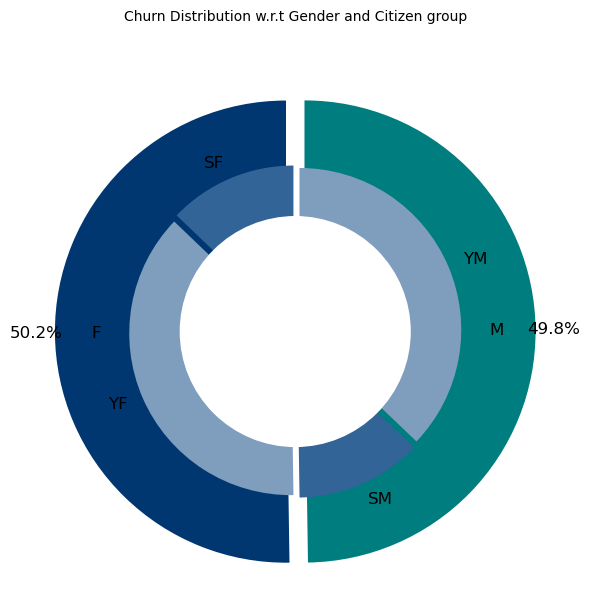

In [38]:
import matplotlib as mpl
mpl.rcParams['text.color'] = 'black'

plt.figure(figsize=(6, 6))
labels =["F","M"]
values = [939,930]
labels_gender = ["SF","YF","SM","YM"]
sizes_gender = [240, 699, 236, 694]
colors = ['#003771', '#007d7e']
colors_gender = ['#326497','#7f9ebe','#326497','#7f9ebe']
explode = (0.4,0.4) 
explode_gender = (0.2,0.2,0.2,0.2)
textprops = {"fontsize":12}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender and Citizen group', fontsize=10, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()




In [59]:
fig = px.histogram(data1, x="ChurnLabel", color="PaymentMethod", title="<b>Churn w.r.t. Customer Payment Method distribution</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


In [60]:
color_map = {"Yes": '#003771', "No": '#007d7e'}
fig = px.histogram(data2, x="PaymentMethod", color="SeniorCitizen", title="<b>Payment Method distribution w.r.t. Citizen group (Churned)</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


In [61]:
fig = px.histogram(data1, x="ChurnLabel", color = "Contract", barmode = "group", title = "<b>Churn w.r.t. Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()


In [62]:
color_map = {"Yes": '#003771', "No": '#007d7e'}
fig = px.histogram(data2, x="Contract", color="SeniorCitizen", title="<b>Customer contract distribution w.r.t. Citizen group(Churned)</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


In [63]:
color_map = {"Yes": '#003771', "No": '#007d7e'}
fig = px.histogram(data1, x="ChurnLabel", color="PaperlessBilling", title="<b>Churn w.r.t. Paperless billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


In [54]:
color_map = {"Yes": '#003771', "No": '#007d7e'}
fig = px.histogram(data2, x="PaperlessBilling", color="SeniorCitizen", title="<b>Paperless billing w.r.t. Citizen group(Churned)</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


In [64]:
color_map = {"Yes": '#003771', "No": '#007d7e', "No internet service": '#7f9ebe'}
churn_status = {'Churned','Not churned'}
fig = px.histogram(data1, x="ChurnLabel", color="OnlineSecurity", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


In [65]:
color_map = {"Yes": '#003771', "No": '#007d7e', "No internet service": '#7f9ebe'}
churn_status = {'Churned','Not churned'}
fig = px.histogram(data1, x="ChurnLabel", color="OnlineBackup", title="<b>Churn w.r.t Online Backup</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


In [66]:
color_map = {"Yes": '#003771', "No": '#007d7e', "No internet service": '#7f9ebe'}
fig = px.histogram(data1, x="ChurnLabel", color="DeviceProtection", title="<b>Churn w.r.t Device Protection</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


In [67]:
color_map = {"Yes": '#003771', "No": '#007d7e', "No internet service": '#7f9ebe'}
fig = px.histogram(data1, x="ChurnLabel", color="TechSupport", title="<b>Churn w.r.t Tech support</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


In [69]:
color_map = {"No": '#007d7e', "Yes": '#003e7e'}
fig = px.histogram(data2, x="TechSupport", color="SeniorCitizen", title="<b>citizen group (Churned) w.r.t Tech support</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


In [72]:
color_map = {"No": '#7f9ebe', "DSL": '#003e7e', "Fiber optic": '#007d7e'}
fig = px.histogram(data1, x="ChurnLabel", color="InternetService", title="<b>Churn w.r.t Internet service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


In [73]:
color_map = {"Yes": '#003e7e', "No": '#007d7e'}
fig = px.histogram(data1, x="ChurnLabel", color="Dependents", title="<b>Churn w.r.t Dependents</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


In [74]:
color_map = {"Yes": '#003e7e', "No": '#007d7e'}
fig = px.histogram(data1, x="ChurnLabel", color="Partner", title="<b>Churn w.r.t Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


In [75]:
data1[data1["PhoneService"]=="No"][["MultipleLines", "ChurnLabel"]].value_counts()
data1[data1["PhoneService"]=="Yes"][["MultipleLines", "ChurnLabel"]].value_counts()
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Not churned', 'Not churned', 'Churned', 'Churned'],
       ["Phone Service", "No Phone Service", "Phone Service", "No Phone Service"]],
  y = [2121, 0, 850, 0],
  name = 'Yes',
))

fig.add_trace(go.Bar(
  x = [['Not churned', 'Not churned', 'Churned', 'Churned'],
       ["Phone Service", "No Phone Service", "Phone Service", "No Phone Service"]],
  y = [2541, 0, 849, 0],
  name = 'No',
))

fig.add_trace(go.Bar(
  x = [['Not churned', 'Not churned', 'Churned', 'Churned'],
       ["Phone Service", "No Phone Service", "Phone Service", "No Phone Service"]],
  y = [0, 512, 0, 170],
  name = 'No phone service',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Phone Service and Multiple lines status</b>")

fig.show()


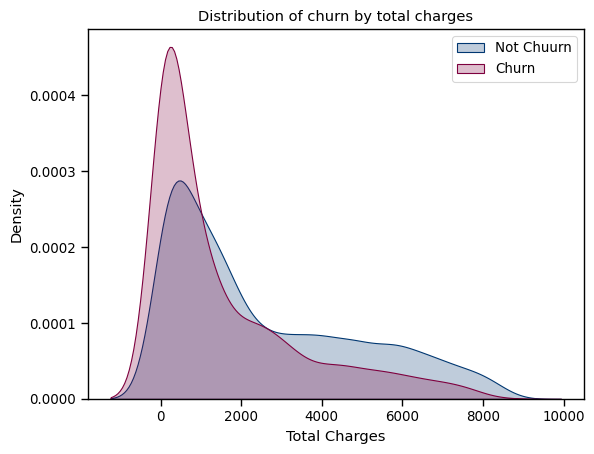

In [84]:
ax = sns.kdeplot(data1.TotalCharges[(data1["ChurnLabel"] == 'No') ],
                color="#003771", shade = True);
ax = sns.kdeplot(data1.TotalCharges[(data1["ChurnLabel"] == 'Yes') ],
                ax =ax, color="#7e003e", shade= True);
ax.legend(["Not Chuurn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of churn by total charges');


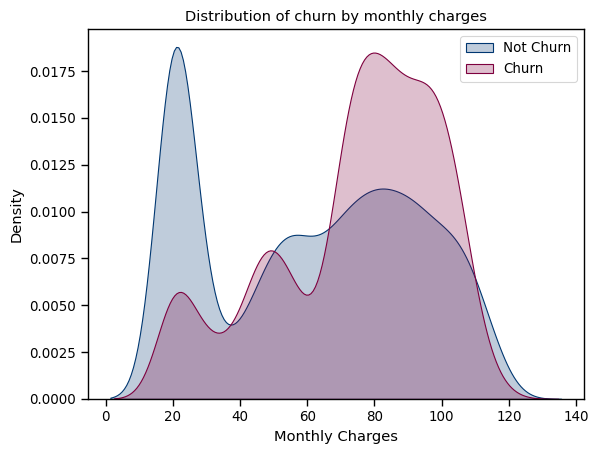

In [82]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data1.MonthlyCharges[(data1["ChurnLabel"] == 'No') ],
                color="#003771", shade = True);
ax = sns.kdeplot(data1.MonthlyCharges[(data1["ChurnLabel"] == 'Yes') ],
                ax =ax, color="#7e003e", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of churn by monthly charges');


In [85]:
fig = px.box(data1, x='ChurnLabel', y = 'TenureMonths')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure(Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn status', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()


In [86]:
data1=data1.drop(['Count','Country','State','City','ZipCode','LatLong','Latitude','Longitude','ChurnReason'], axis=1)

In [87]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   TenureMonths      7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [88]:
for col in data1:
    print(col , "\n" , data1[col].unique() , "\n")

CustomerID 
 ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK'] 

Gender 
 ['Male' 'Female'] 

SeniorCitizen 
 ['No' 'Yes'] 

Partner 
 ['No' 'Yes'] 

Dependents 
 ['No' 'Yes'] 

TenureMonths 
 [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0] 

PhoneService 
 ['Yes' 'No'] 

MultipleLines 
 ['No' 'Yes' 'No phone service'] 

InternetService 
 ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity 
 ['Yes' 'No' 'No internet service'] 

OnlineBackup 
 ['Yes' 'No' 'No internet service'] 

DeviceProtection 
 ['No' 'Yes' 'No internet service'] 

TechSupport 
 ['No' 'Yes' 'No internet service'] 

StreamingTV 
 ['No' 'Yes' 'No internet service'] 

StreamingMovies 
 ['No' 'Yes' 'No internet service'] 

Contract 
 ['Month-to-month' 'Two year' 'One year'] 

PaperlessBilling 
 ['Yes' 'No'] 

PaymentMetho

In [89]:
cat = ['SeniorCitizen']
for i in cat:
    data1[i].replace(to_replace='Yes', value=1, inplace=True)
    data1[i].replace(to_replace='No', value=0, inplace=True)

In [90]:
cat = ['ChurnLabel', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for i in cat:
    data1[i].replace(to_replace='Yes', value=1, inplace=True)
    data1[i].replace(to_replace='No', value=0, inplace=True)

In [91]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   TenureMonths      7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [92]:
for col in data1:
    print(col , "\n" , data1[col].unique() , "\n")

CustomerID 
 ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK'] 

Gender 
 ['Male' 'Female'] 

SeniorCitizen 
 [0 1] 

Partner 
 [0 1] 

Dependents 
 [0 1] 

TenureMonths 
 [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0] 

PhoneService 
 [1 0] 

MultipleLines 
 ['No' 'Yes' 'No phone service'] 

InternetService 
 ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity 
 ['Yes' 'No' 'No internet service'] 

OnlineBackup 
 ['Yes' 'No' 'No internet service'] 

DeviceProtection 
 ['No' 'Yes' 'No internet service'] 

TechSupport 
 ['No' 'Yes' 'No internet service'] 

StreamingTV 
 ['No' 'Yes' 'No internet service'] 

StreamingMovies 
 ['No' 'Yes' 'No internet service'] 

Contract 
 ['Month-to-month' 'Two year' 'One year'] 

PaperlessBilling 
 [1 0] 

PaymentMethod 
 ['Mailed check' 'Electronic che

<AxesSubplot:>

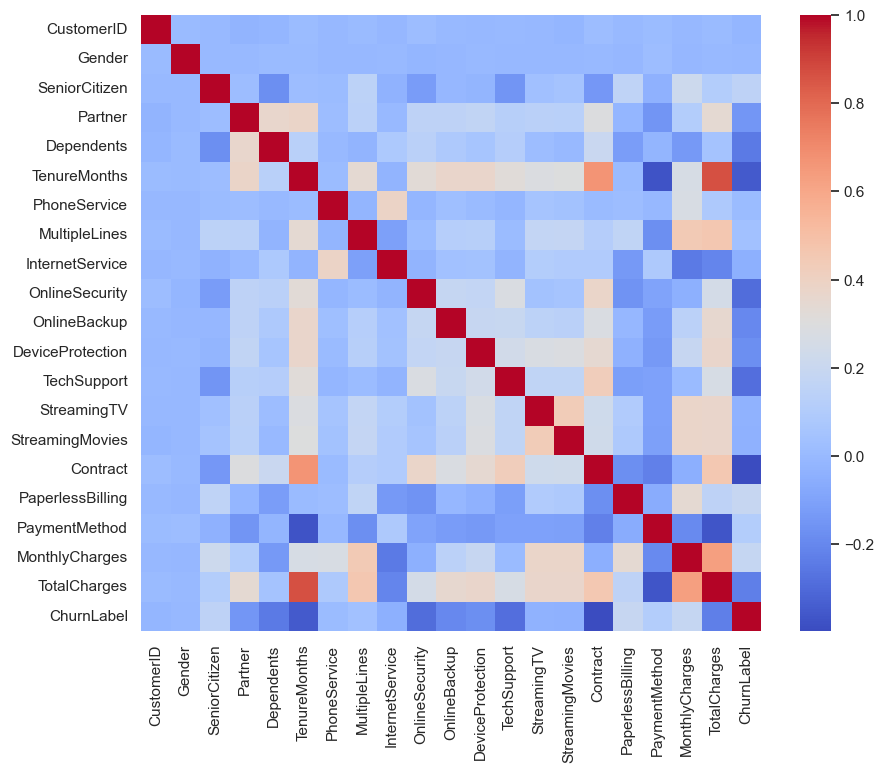

In [95]:
le = LabelEncoder()
data1 = data1.apply(LabelEncoder().fit_transform)

fig = plt.figure(figsize=(10, 8))
fig.set_facecolor('white')

feature_corr = data1.corr()
sns.heatmap(feature_corr, annot=False, cmap='coolwarm')

<AxesSubplot:>

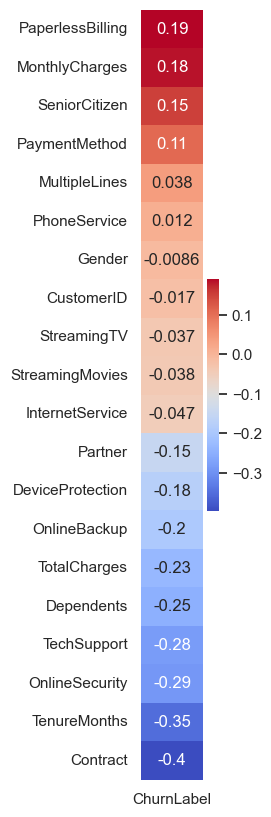

In [96]:
fig = plt.figure(figsize=(1,10))
fig.set_facecolor('white')
sns.heatmap(data1.corr()[['ChurnLabel']].sort_values('ChurnLabel', ascending=False)[1:], annot=True, cmap="coolwarm")

In [97]:
data1.corr().abs()['ChurnLabel'].sort_values(ascending = False)


ChurnLabel          1.000000
Contract            0.396713
TenureMonths        0.352229
OnlineSecurity      0.289309
TechSupport         0.282492
Dependents          0.248542
TotalCharges        0.231873
OnlineBackup        0.195525
PaperlessBilling    0.191825
MonthlyCharges      0.183523
DeviceProtection    0.178134
SeniorCitizen       0.150889
Partner             0.150448
PaymentMethod       0.107062
InternetService     0.047291
StreamingMovies     0.038492
MultipleLines       0.038037
StreamingTV         0.036581
CustomerID          0.017447
PhoneService        0.011942
Gender              0.008612
Name: ChurnLabel, dtype: float64

In [98]:
feat = ['ChurnLabel', 'Contract', 'TenureMonths', 'OnlineSecurity', 'TechSupport', 'Dependents', 'TotalCharges', 'OnlineBackup', 'PaperlessBilling', 'MonthlyCharges', 'DeviceProtection', 'SeniorCitizen', 'Partner', 'PaymentMethod']
data1_clean = data1[feat]
data1_clean.head()   

ChurnLabel  Contract  TenureMonths  OnlineSecurity  TechSupport  \
0           1         0             2               2            0   
1           1         0             2               0            0   
2           1         0             8               0            0   
3           1         0            28               0            2   
4           1         0            49               0            0   

   Dependents  TotalCharges  OnlineBackup  PaperlessBilling  MonthlyCharges  \
0           0           536             2                 1             436   
1           1           674             0                 1             729   
2           1          2173             0                 1            1274   
3           1          4384             0                 1            1371   
4           1          5421             2                 1            1349   

   DeviceProtection  SeniorCitizen  Partner  PaymentMethod  
0                 0              0        0              3  
1                 0              0        0              2  
2                 2              0        0              2  
3                 2              0        1              2  
4                 2              0        0              0

In [100]:
zero  = data1_clean[data1_clean['ChurnLabel']==0]
one = data1_clean[data1_clean['ChurnLabel']==1]

from sklearn.utils import resample
# upsample minority (churn yes/one)
upsample = resample(one, replace = True, n_samples = 5000) 
data1_clean = pd.concat([zero, upsample])

from sklearn.utils import shuffle
data1_clean = shuffle(data1_clean)

In [101]:
from sklearn.model_selection import train_test_split
y = data1_clean.ChurnLabel
x = data1_clean.drop(['ChurnLabel'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [102]:
# list model name and accuracies
models = []
accuracies = []

def fig_roc_curve(model, model_name): 
    y_prob = model.predict_proba(x_test)[:,1]
    fp, tp, treshold = roc_curve(y_test, y_prob)

    fig = plt.figure(figsize=(10,9)) 
    fig.set_facecolor('white')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fp, tp, label=model ,color = "r")
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_name + ' ROC Curve',fontsize=16)
    plt.show()

Accuracy =  0.7667867671143138 

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1594
           1       0.74      0.78      0.76      1459

    accuracy                           0.77      3053
   macro avg       0.77      0.77      0.77      3053
weighted avg       0.77      0.77      0.77      3053

Confusion Matrix: 
 [[1204  390]
 [ 322 1137]]


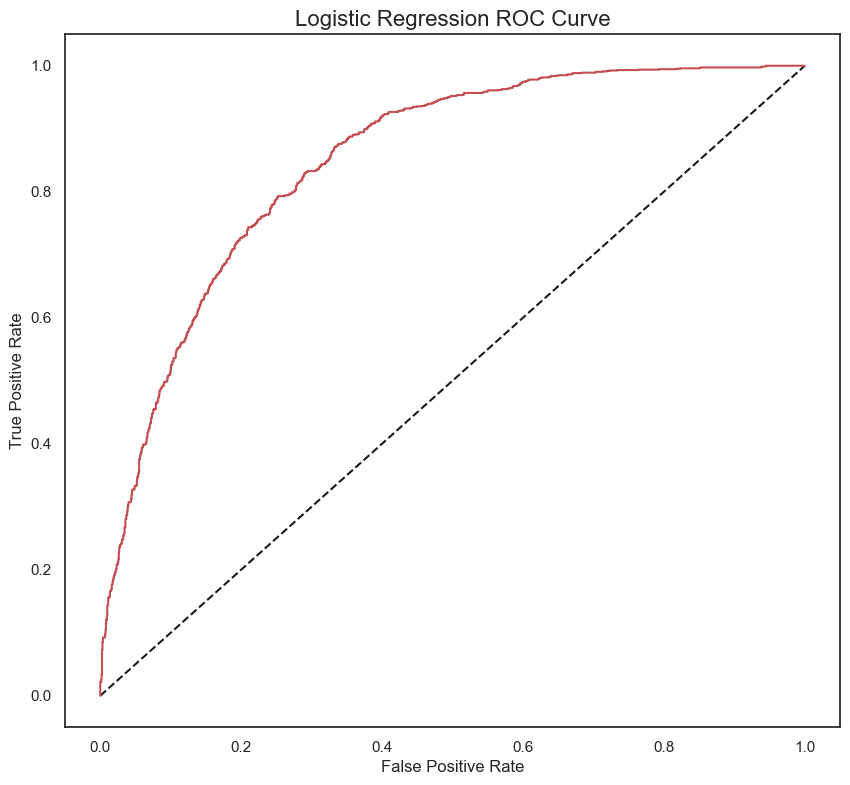

In [103]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model = logreg.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Logistic Regression'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

Accuracy =  0.8565345561742548 

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1594
           1       0.81      0.92      0.86      1459

    accuracy                           0.86      3053
   macro avg       0.86      0.86      0.86      3053
weighted avg       0.86      0.86      0.86      3053

Confusion Matrix: 
 [[1275  319]
 [ 119 1340]]


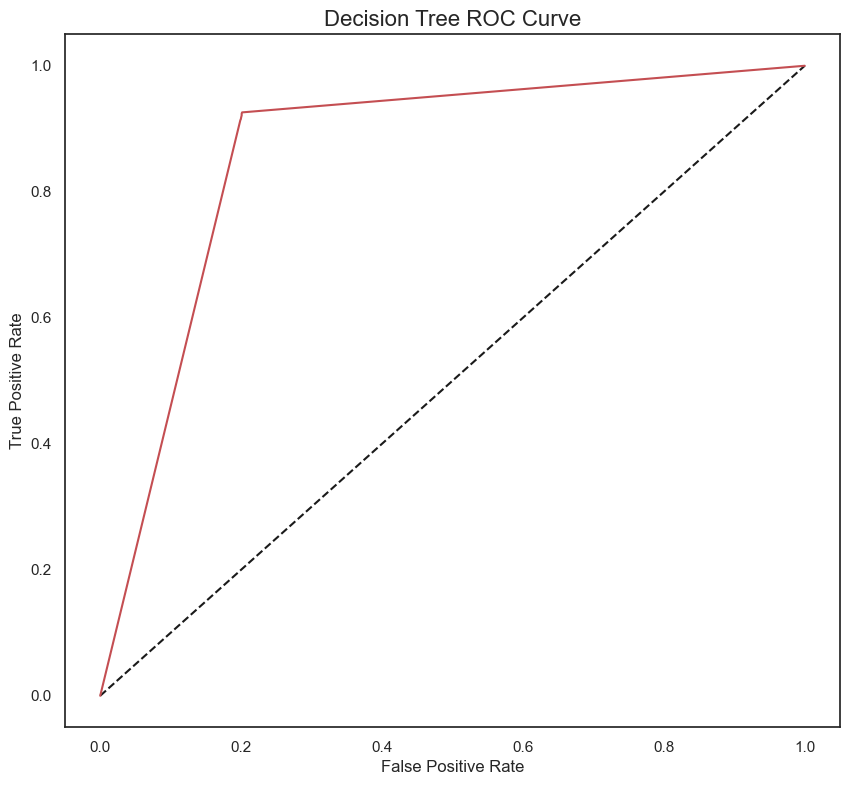

In [104]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model = dt.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Decision Tree'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

In [105]:
from sklearn import svm
svmc = svm.SVC()
model = svmc.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)

model_name = 'SVM'
models.append(model_name)
accuracies.append(acc)

Accuracy =  0.7320668195217819 

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1594
           1       0.72      0.73      0.72      1459

    accuracy                           0.73      3053
   macro avg       0.73      0.73      0.73      3053
weighted avg       0.73      0.73      0.73      3053

Confusion Matrix: 
 [[1174  420]
 [ 398 1061]]


Accuracy =  0.8453979692106125 

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1594
           1       0.80      0.90      0.85      1459

    accuracy                           0.85      3053
   macro avg       0.85      0.85      0.85      3053
weighted avg       0.85      0.85      0.85      3053

Confusion Matrix: 
 [[1274  320]
 [ 152 1307]]


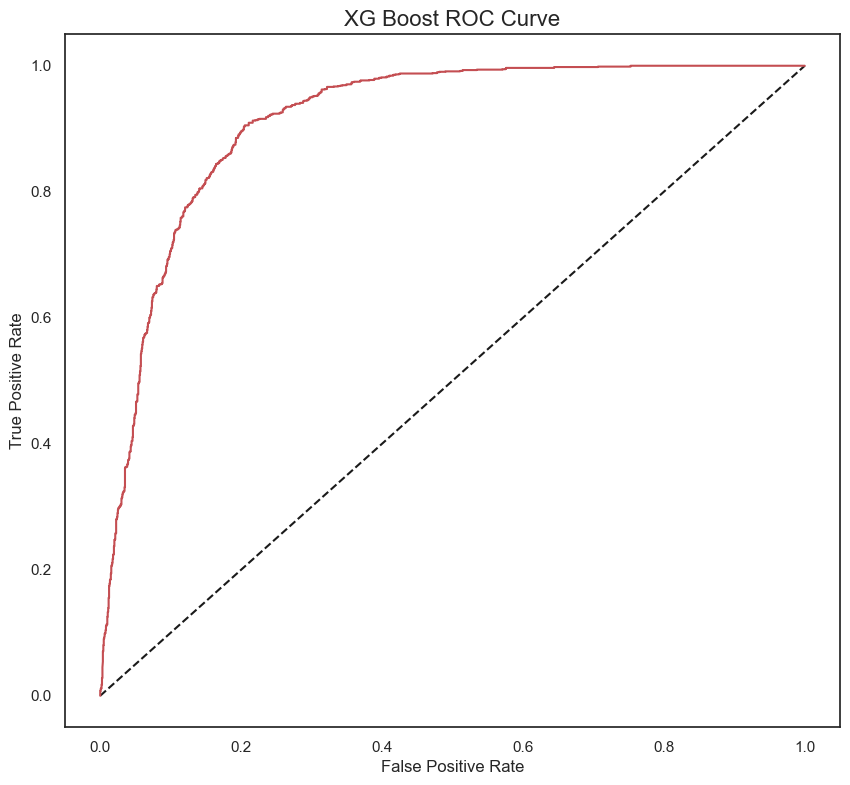

In [106]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss')
model = xgb.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'XG Boost'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

Accuracy =  0.7766131673763511 

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1594
           1       0.75      0.81      0.78      1459

    accuracy                           0.78      3053
   macro avg       0.78      0.78      0.78      3053
weighted avg       0.78      0.78      0.78      3053

Confusion Matrix: 
 [[1196  398]
 [ 284 1175]]


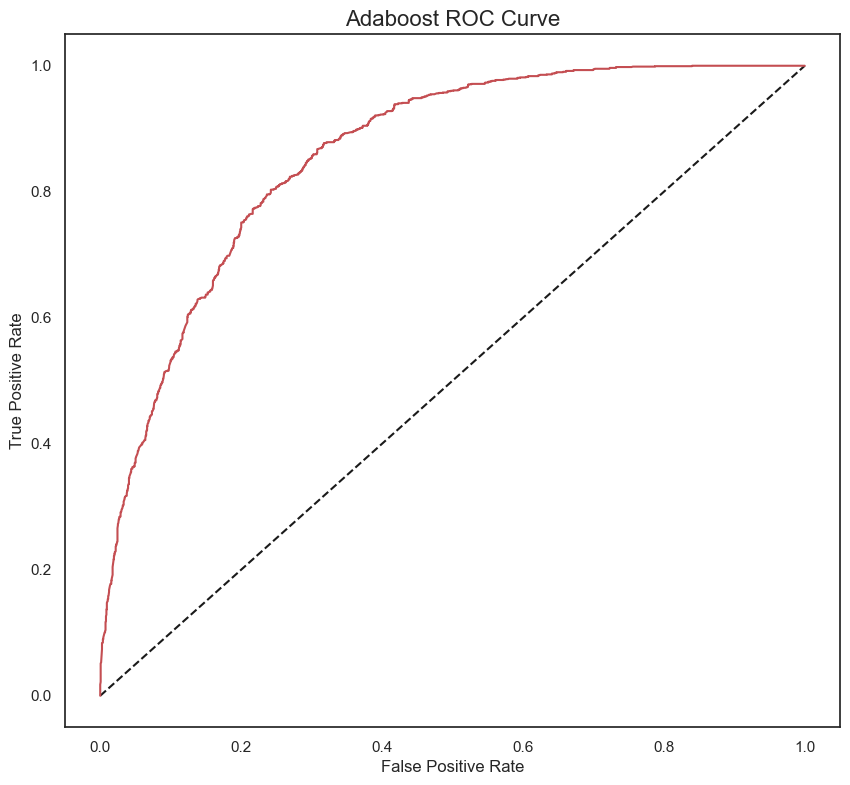

In [107]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
model = adb.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Adaboost'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

Accuracy =  0.8856862102849656 

              precision    recall  f1-score   support

           0       0.94      0.84      0.88      1594
           1       0.84      0.94      0.89      1459

    accuracy                           0.89      3053
   macro avg       0.89      0.89      0.89      3053
weighted avg       0.89      0.89      0.89      3053

Confusion Matrix: 
 [[1337  257]
 [  92 1367]]


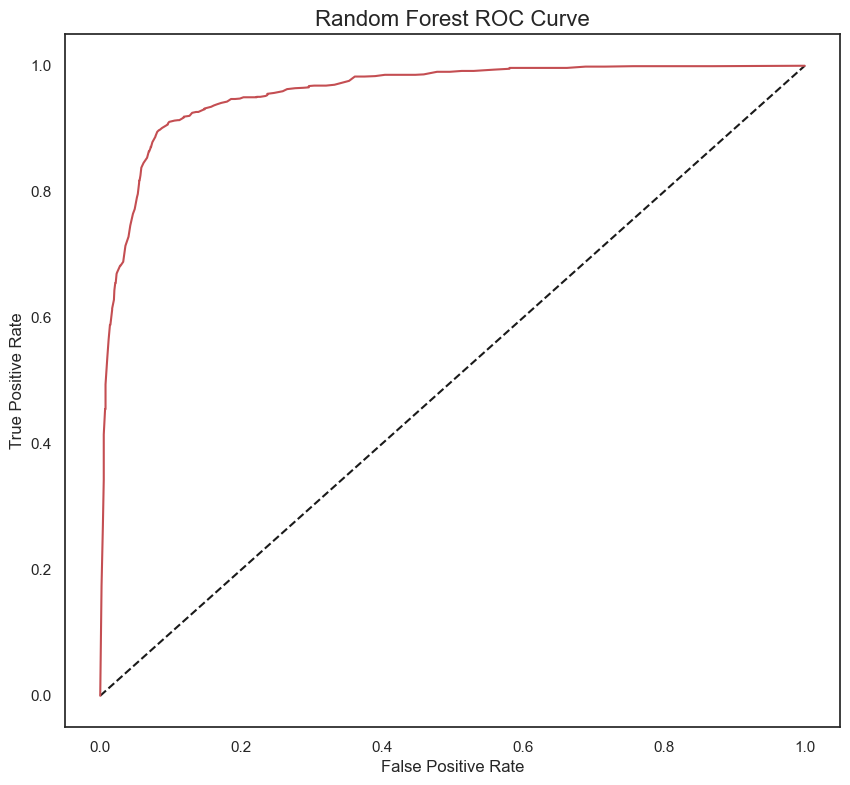

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model = rf.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Random Forest'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

In [109]:
data1_model = pd.DataFrame(list(zip(models, accuracies)), columns=['model', 'acc'])
data1_model = data1_model.sort_values(by='acc', ascending=False)

In [110]:
data1_model

model       acc
5        Random Forest  0.885686
1        Decision Tree  0.856535
3             XG Boost  0.845398
4             Adaboost  0.776613
0  Logistic Regression  0.766787
2                  SVM  0.732067

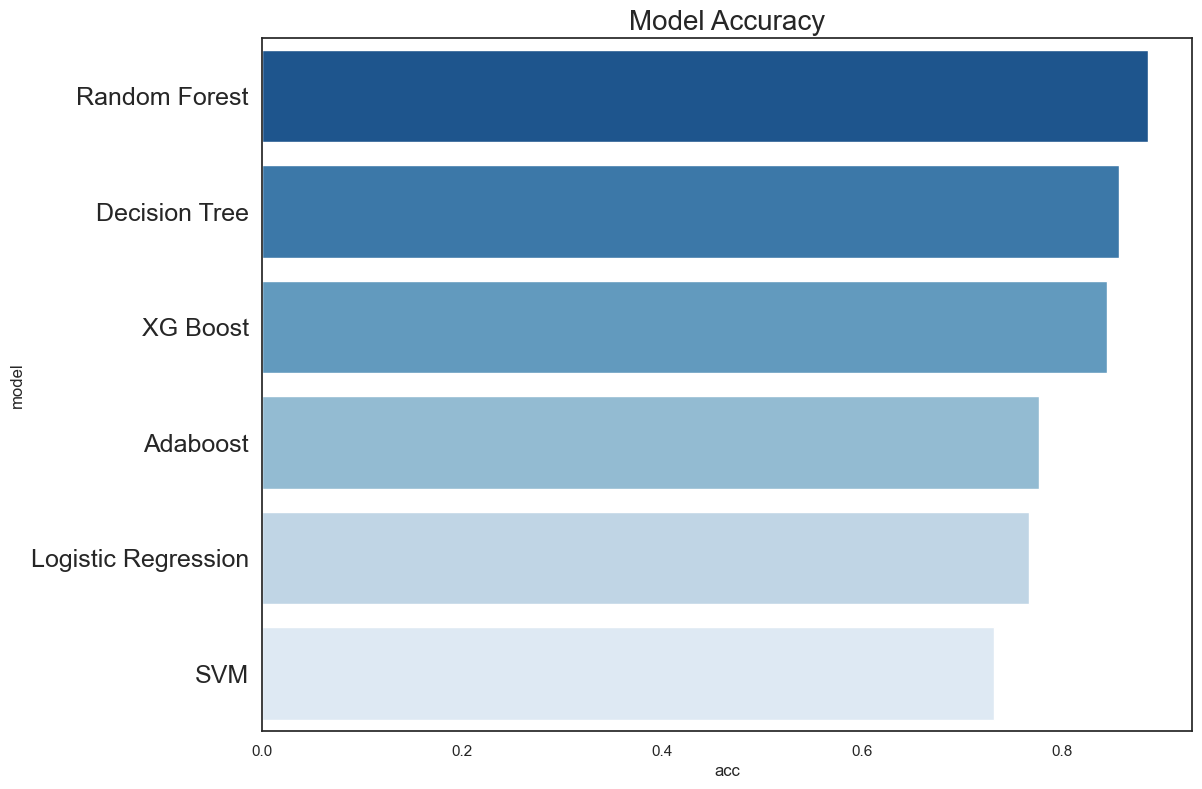

In [115]:
fig = plt.figure(figsize=(12,9))
fig.set_facecolor('white')
ax = sns.barplot(data=data1_model, x='acc', y='model', palette='Blues_r')
ax.set_title('Model Accuracy', fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
plt.show()